Aubrey Winger
alw8ef
On my honor I pledge that I have neither given nor recieved help on this assignment

Question 1

See hand written work at the end of the pdf

Question 2

The level of alpha seems to affect the skew of the distribution and the width of the bell shaped part of the distribution. Distributions with higher levels of alpha are more right skewed, and have a smaller range of theta included in the bell shaped part of the distribution. As beta gets larger, the maximum value of h(theta|x) (the peak of the curve) decreases. For the data with X=50, N=100, there is a smaller range of theta within one standard deviation of the the mean.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m = [0.25, 0.5, 0.75, 0.9]
n = [2, 10, 50, 100]
alpha = np.multiply(m,n)
beta = n-alpha

In [3]:
beta

array([ 1.5,  5. , 12.5, 10. ])

In [4]:
theta = np.linspace(0,1,100)
X = 25
N = 50

These are the graphs for X = 25 and N = 50

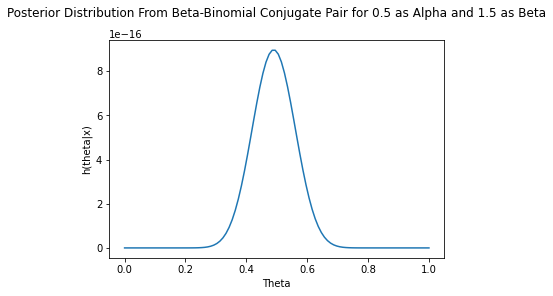

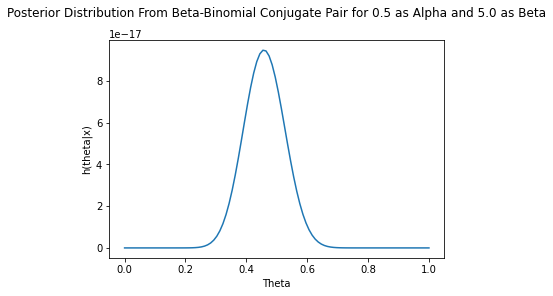

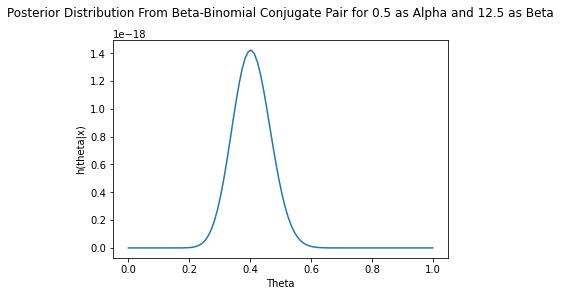

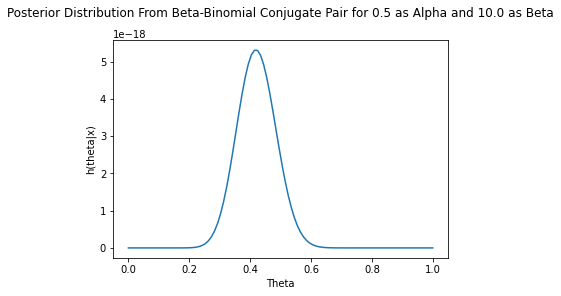

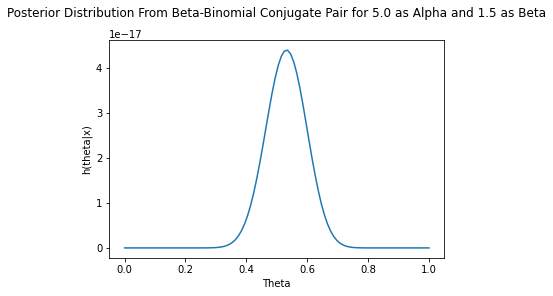

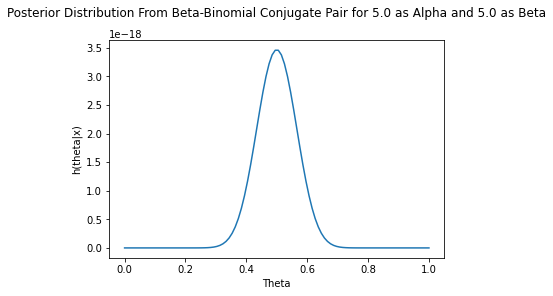

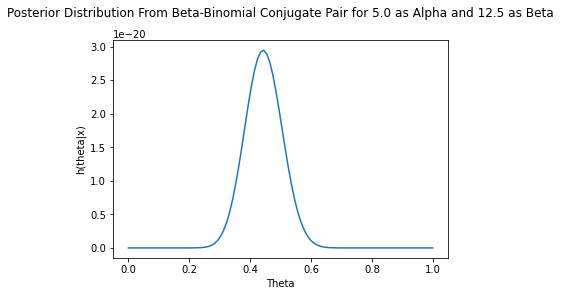

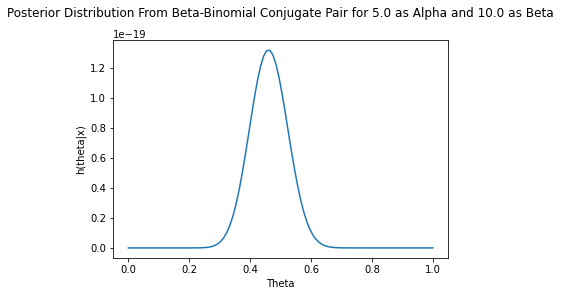

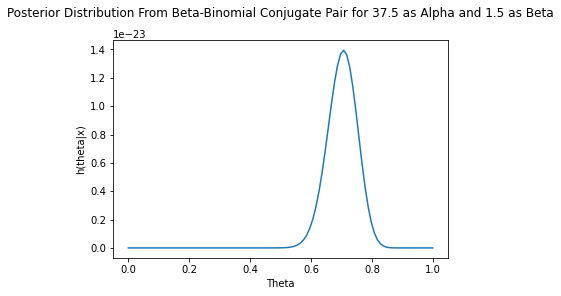

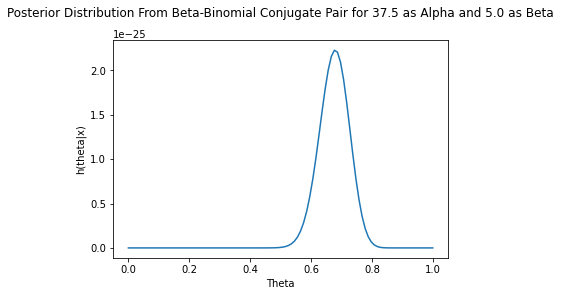

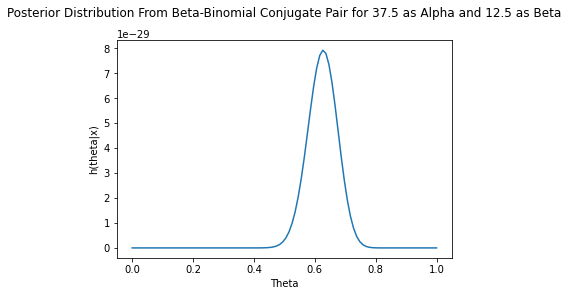

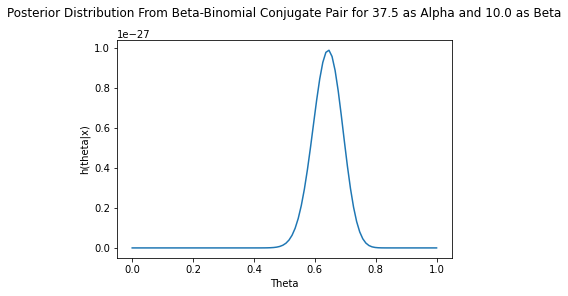

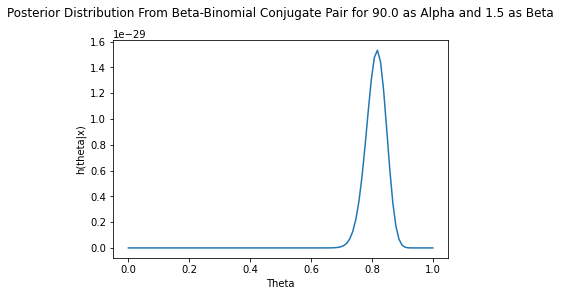

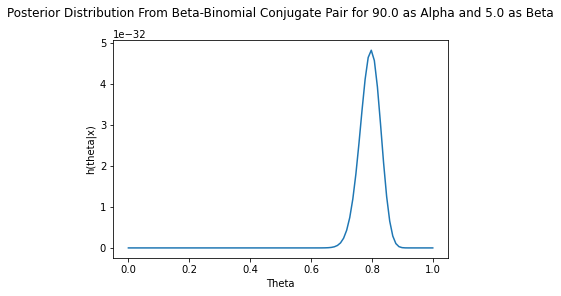

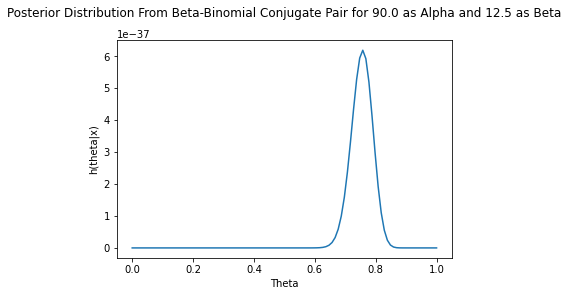

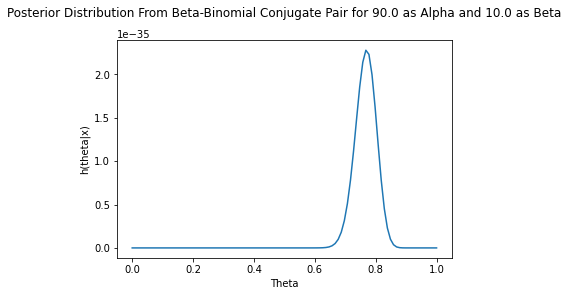

In [5]:
i=0
for a in alpha:
    for b in beta:
        h = theta**(X+a-1)*(1-theta)**(N-X+b-1)
        plt.figure(i)
        plt.plot(theta,h)
        plt.xlabel("Theta")
        plt.ylabel("h(theta|x)")
        plt.title("Posterior Distribution From Beta-Binomial Conjugate Pair for "+str(a)+" as Alpha and "+str(b)+" as Beta",y=1.08)
        i+=1

In [6]:
X = 50
N = 100

These are the graphs for X = 50 and N=100

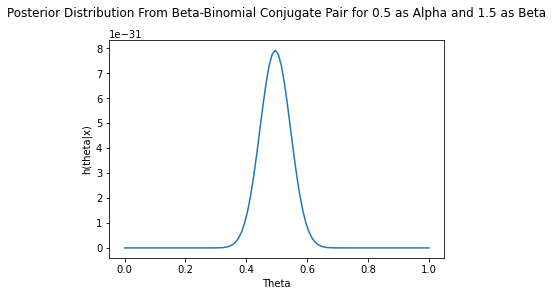

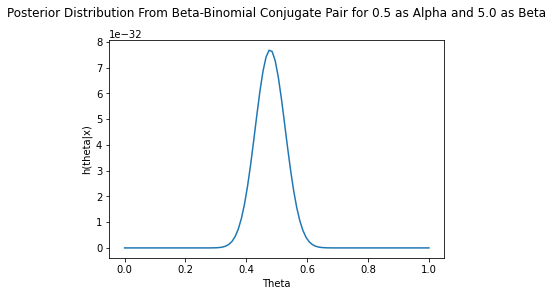

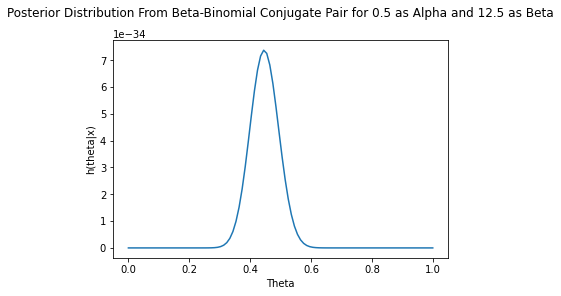

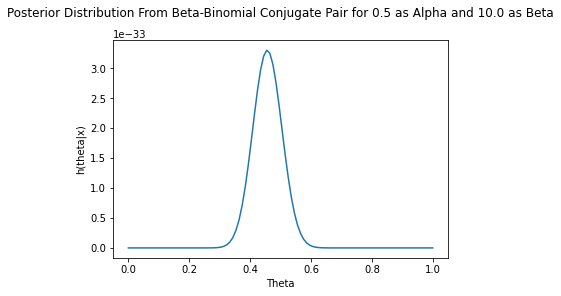

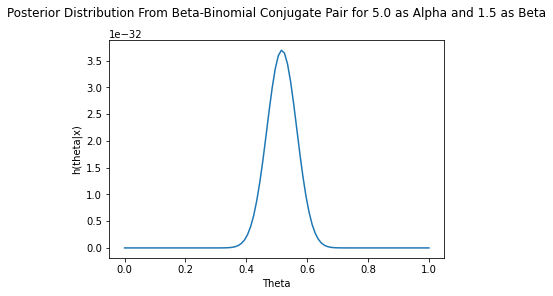

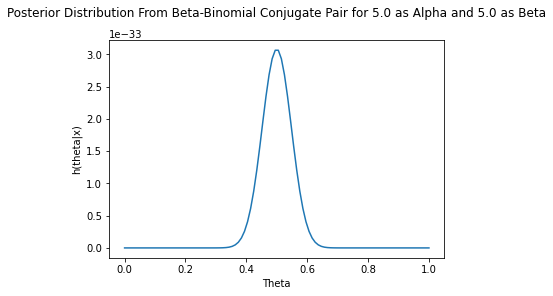

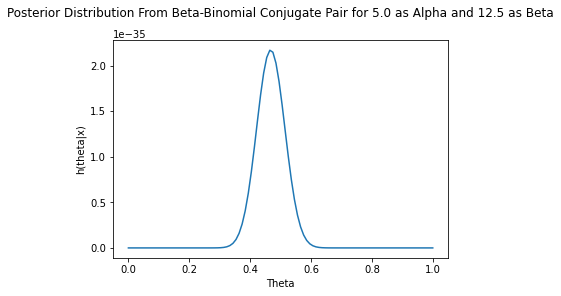

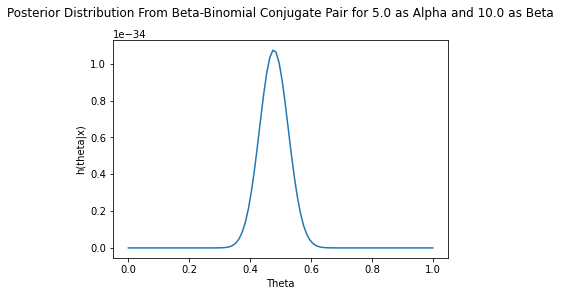

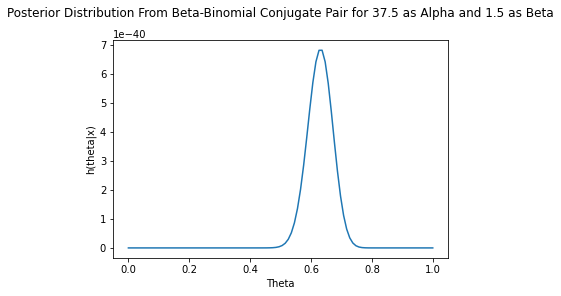

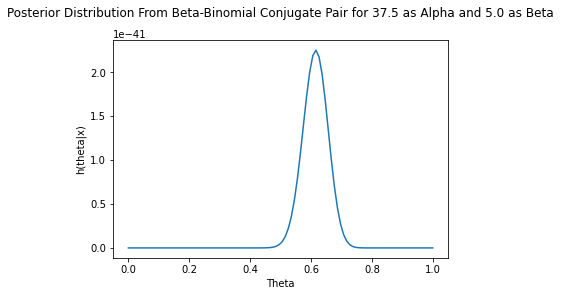

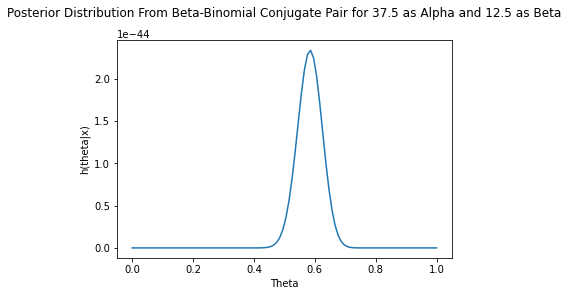

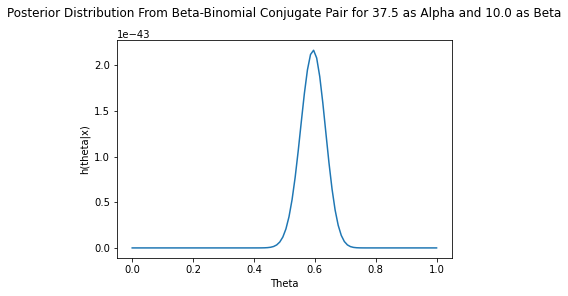

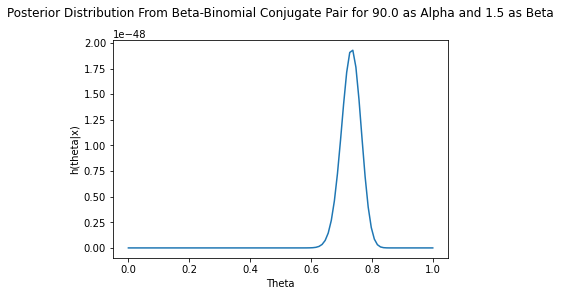

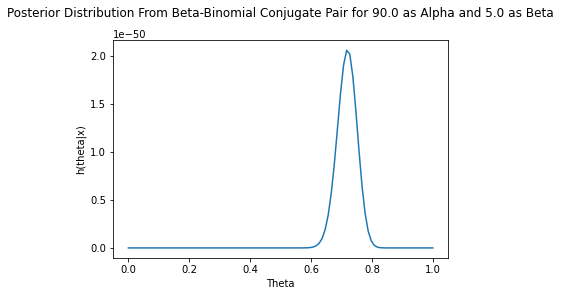

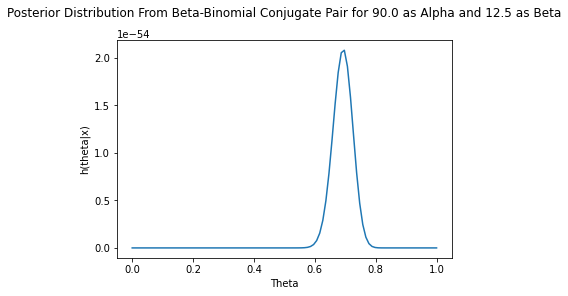

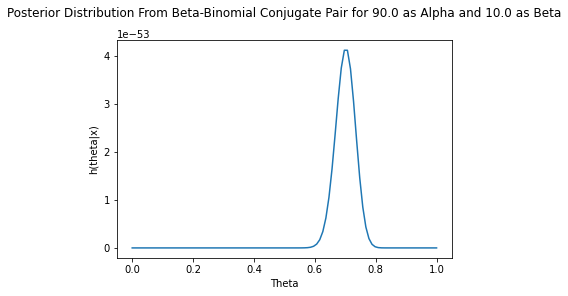

In [7]:
i=0
for a in alpha:
    for b in beta:
        h = theta**(X+a-1)*(1-theta)**(N-X+b-1)
        plt.figure(i)
        plt.plot(theta,h)
        plt.xlabel("Theta")
        plt.ylabel("h(theta|x)")
        plt.title("Posterior Distribution From Beta-Binomial Conjugate Pair for "+str(a)+" as Alpha and "+str(b)+" as Beta",y=1.08)
        i+=1

Question 3

See hand written work at the end of the pdf

Question 4

For both scenarios, beta priors that show low likelihood of a book purchase decreased the value of the theta posterior. However, for the first scenario (the posterior probabilities for purchases of art books, history books and coffee table books), the change in theta posterior is larger than it is for the second scenario (separate probabilities for purchases of the new book given each possible combination of prior purchases of art books, history books and coffee table books).

In [8]:
import pandas as pd

In [9]:
data = pd.read_csv('ArtHistBooks.csv')

In [10]:
def alpha_post(alpha_0, data):
    sucess_Art = alpha_0
    sucess_History = alpha_0
    sucess_Table = alpha_0
    for x in range(len(data)):
        if data.ArtBooks[x]!=0:
            sucess_Art+=1
        if data.HistoryBooks[x]!=0:
            sucess_History+=1
        if data.TableBooks[x]!=0:
            sucess_Table+=1
    return [sucess_Art,sucess_History,sucess_Table]

In [11]:
def beta_post(beta_0, N, data):
    sucess_Art = beta_0+N
    sucess_History = beta_0+N
    sucess_Table = beta_0+N
    for x in range(len(data)):
        if data.ArtBooks[x]!=0:
            sucess_Art-=1
        if data.HistoryBooks[x]!=0:
            sucess_History-=1
        if data.TableBooks[x]!=0:
            sucess_Table-=1
    return [sucess_Art,sucess_History,sucess_Table]

In [12]:
def theta_post(beta, alpha, N, data):
    sucess_Art = 0
    sucess_History = 0
    sucess_Table = 0
    alpha = np.array(alpha)
    beta = np.array(beta)
    for x in range(len(data)):
        if data.ArtBooks[x]!=0:
            sucess_Art+=1
        if data.HistoryBooks[x]!=0:
            sucess_History+=1
        if data.TableBooks[x]!=0:
            sucess_Table+=1
    sucess_Art = (sucess_Art + alpha[0])/(N+alpha[0]+beta[0])
    sucess_History = (sucess_History + alpha[1]) /(N+alpha[1]+beta[1])
    sucess_Table = (sucess_Table + alpha[2]) /(N+alpha[2]+beta[2])
    return [sucess_Art,sucess_History,sucess_Table]

In [13]:
alpha=alpha_post(1,data)
beta = beta_post(1,len(data),data)
theta = theta_post(beta,alpha,len(data),data)

In [14]:
pd.DataFrame(list(zip(alpha,beta,theta)), index=['Art','History','Coffee Table'],\
             columns=['Alpha Posterior','Beta Posterior','Theta Posterior'])

,Alpha Posterior,Beta Posterior,Theta Posterior
Art,302,700,0.301199
History,544,458,0.542957
Coffee Table,381,621,0.380120


In [15]:
alpha2 =alpha_post(1,data)
beta2 = beta_post(200,len(data),data)
theta2 = theta_post(beta2,alpha2,len(data),data)

In [16]:
pd.DataFrame(list(zip(alpha2,beta2,theta2)), index=['Art','History','Coffee Table'],\
             columns=['Alpha Posterior','Beta Posterior','Theta Posterior'])

,Alpha Posterior,Beta Posterior,Theta Posterior
Art,302,899,0.273966
History,544,657,0.493866
Coffee Table,381,820,0.345752


In [17]:
books = pd.DataFrame(list(zip([1,0,0,1,1,0,0,1],[0,1,0,1,0,1,0,1],[0,0,1,0,1,1,0,1],[1,1,1,1,1,1,1,1])),\
            columns=['ArtBooks','HistoryBooks','TableBooks','Purchase'])

In [18]:
for i in data:
    for j in range(len(data[i])):
        if(data[i][j]>0):
            data[i][j]=1

In [19]:
list1 = [0,0,0,0,0,0,0,0]
for i in range(len(books)):
    row = books.iloc[[i]]
    for j in range(len(data)):
        if row.reset_index(drop=True).equals(data.iloc[[j]].reset_index(drop=True)):
            list1[i] +=1

In [20]:
list1

[12, 10, 3, 16, 4, 14, 4, 26]

In [21]:
#N= total number of times a combination appeared - total number of times they bought a book
#189
alpha_1 = []
beta_1 = []
theta_1 = []
count = 0
for i in list1:
    alpha_1.append(i + 1)
    beta_1.append(1+len(data)-i)
    theta_1.append((i+alpha_1[count])/(len(data)+alpha_1[count]+beta_1[count]))
    count+=1

In [22]:
pd.DataFrame(list(zip([1,0,0,1,1,0,0,1],[0,1,0,1,0,1,0,1],[0,0,1,0,1,1,0,1],alpha_1,beta_1,theta_1)),
            columns=['ArtBooks','HistoryBooks','TableBooks',\
                     'Alpha Posterior','Beta Posterior','Theta Posterior'])

,ArtBooks,HistoryBooks,TableBooks,Alpha Posterior,Beta Posterior,Theta Posterior
0,1,0,0,13,989,0.012488
1,0,1,0,11,991,0.010490
2,0,0,1,4,998,0.003497
3,1,1,0,17,985,0.016484
4,1,0,1,5,997,0.004496
5,0,1,1,15,987,0.014486
6,0,0,0,5,997,0.004496
7,1,1,1,27,975,0.026474


In [23]:
alpha_2 = []
beta_2 = []
theta_2 = []
count = 0
for i in list1:
    alpha_2.append(i + 1)
    beta_2.append(200+len(data)-i)
    theta_2.append((i+alpha_2[count])/(len(data)+alpha_2[count]+beta_2[count]))
    count += 1

In [24]:
pd.DataFrame(list(zip([1,0,0,1,1,0,0,1],[0,1,0,1,0,1,0,1],[0,0,1,0,1,1,0,1],alpha_2,beta_2,theta_2)),
            columns=['ArtBooks','HistoryBooks','TableBooks',\
                     'Alpha Posterior','Beta Posterior','Theta Posterior'])

,ArtBooks,HistoryBooks,TableBooks,Alpha Posterior,Beta Posterior,Theta Posterior
0,1,0,0,13,1188,0.011358
1,0,1,0,11,1190,0.009541
2,0,0,1,4,1197,0.003180
3,1,1,0,17,1184,0.014993
4,1,0,1,5,1196,0.004089
5,0,1,1,15,1186,0.013176
6,0,0,0,5,1196,0.004089
7,1,1,1,27,1174,0.024080


Question 5

The T value found when comparing the Bayesian estimates for the posterior means for each group was 277.96. Since this is such a large value, it can be concluded that there is a significant different in the posterior means for the two groups. Additionally, the posterior marginal distribution probabilities have 304 and 162 degrees of freedom for the normal and chd patients respectively. Finally, precision tables for the distribution are provided at then end of the code for this question.

In [25]:
data2 = pd.read_csv("CHDdata.csv")

In [26]:
chd = data2.chd.copy()
data2 = data2.drop(['famhist','chd'],axis=1)

In [27]:
data2_scaled = (data2 - data2.mean(axis=0))/ data2.std(axis=0)

In [28]:
data2_scaled

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
0,1.057417,1.821099,0.477894,-0.295183,-0.418017,-0.176594,3.274189,0.628654
1,0.276789,-0.789382,-0.159507,0.411694,0.193134,0.670646,-0.612081,1.381617
2,-0.991731,-0.774141,-0.608585,0.883374,-0.112441,0.734723,-0.540597,0.217947
3,1.545310,0.841352,0.806252,1.622382,-0.214300,1.411091,0.294742,1.039361
4,-0.211103,2.169453,-0.598928,0.305020,0.702427,-0.012842,1.645991,0.423301
...,...,...,...,...,...,...,...,...
457,3.692037,-0.704470,0.598614,0.811401,1.109862,0.570971,-0.696228,1.039361
458,2.130781,0.122871,-0.159507,0.860240,-0.112441,0.608942,0.068445,0.628654
459,-1.479624,-0.138395,-1.521228,-1.307946,-1.334744,-1.413043,0.391960,0.834008
460,-0.991731,0.384137,3.317227,0.691875,1.109862,0.309916,0.282897,-0.192760


In [29]:
data2_scaled['chd'] = chd
data_normal = data2_scaled[data2_scaled['chd']==0].drop("chd",axis=1)
data_chd = data2_scaled[data2_scaled['chd']==1].drop("chd",axis=1)

In [30]:
mean_post_norm = (len(data_normal)*np.mean(data_normal,axis=0)) /(1+len(data_normal))

In [31]:
mean_post_chd = (len(data_chd)*np.mean(data_chd,axis=0)) /(1+len(data_chd))

In [32]:
mean_post_norm

sbp         -0.139396
tobacco     -0.217201
ldl         -0.190631
adiposity   -0.184158
typea       -0.074756
obesity     -0.072538
alcohol     -0.045315
age         -0.270289
dtype: float64

In [33]:
mean_post_chd

sbp          0.262342
tobacco      0.408770
ldl          0.358765
adiposity    0.346584
typea        0.140689
obesity      0.136515
alcohol      0.085283
age          0.508680
dtype: float64

In [34]:
D = abs(mean_post_chd-mean_post_norm).values.reshape((8,1))

In [35]:
#s_2 = (((len(data_normal)-1)*cov_normal)+((len(data_chd)-1)*cov_chd))/(len(data_normal)+len(data_chd)-2)
x_bar_norm = np.reshape(np.mean(data_normal,axis=0).to_numpy(),(8,1)).T
x_bar_chd =np.reshape(np.mean(data_chd,axis=0).to_numpy(),(8,1)).T
sum_squares_norm = (data_normal-x_bar_norm).T.dot((data_normal-x_bar_norm))
sum_squares_chd = (data_chd-x_bar_chd).T.dot((data_chd-x_bar_chd))
V = 1
N_norm = len(data_normal)
N_chd = len(data_chd)
u0 = 0
r_prior = np.identity(8)
r_post_norm = r_prior + sum_squares_norm+(((V*N_norm)/(V+N_norm))*(u0-x_bar_norm.T).dot((u0-x_bar_norm.T).T))
r_post_chd = r_prior + sum_squares_chd+(((V*N_chd)/(V+N_chd))*(u0-x_bar_chd.T).dot((u0-x_bar_chd.T).T))

In [36]:
r_post_norm

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
sbp,232.776817,38.192464,36.844511,108.069225,-19.580166,78.847292,42.509309,106.878374
tobacco,38.192464,187.207794,49.129139,77.864212,4.815670,39.220705,44.874983,111.804473
ldl,36.844511,49.129139,246.582903,110.651388,2.599954,84.889707,10.722154,85.763065
adiposity,108.069225,77.864212,110.651388,301.429084,-26.585523,207.544963,61.806135,202.347540
typea,-19.580166,4.815670,2.599954,-26.585523,283.897049,9.614402,25.266766,-36.778523
obesity,78.847292,39.220705,84.889707,207.544963,9.614402,284.697460,42.509971,100.566651
alcohol,42.509309,44.874983,10.722154,61.806135,25.266766,42.509971,278.349815,45.018880
age,106.878374,111.804473,85.763065,202.347540,-36.778523,100.566651,45.018880,313.457737


In [37]:
r_pooled = np.linalg.inv(((1/len(data_normal))+(1/len(data_chd)))*((((len(data_normal)-1)*\
                np.linalg.inv(r_post_norm))+((len(data_chd)-1)*\
                np.linalg.inv(r_post_chd)))/(len(data_normal)+len(data_chd)-2)))

In [38]:
T_squared = D.T.dot(r_pooled).dot(D)
T_squared

array([[77262.62452068]])

T value

In [39]:
T = np.sqrt(T_squared)
T

array([[277.96155223]])

Degrees of freedom

In [40]:
#normal 
k=8
alpha = 9
dof_norm = alpha + len(data_normal) - k + 1
#chd
dof_chd = alpha + len(data_chd) - k + 1

In [41]:
dof_norm

304

In [42]:
dof_chd

162

Precision

In [43]:
#normal
precision_norm = (1+len(data_normal))*(alpha + len(data_normal) - k + 1)*np.linalg.inv(r_post_norm)
#chd
precision_chd = (1+len(data_chd))*(alpha + len(data_chd) - k + 1)*(np.linalg.inv(r_post_chd))

In [44]:
pd.DataFrame(precision_norm)

,0,1,2,3,4,5,6,7
0,499.756713,7.601359,10.735342,-69.528366,18.937081,-48.696921,-39.392051,-107.662689
1,7.601359,649.205686,-55.364834,-7.375819,-32.998069,17.047670,-67.058717,-213.952041
2,10.735342,-55.364834,458.531819,-123.918090,-18.468864,-36.943136,28.299207,-23.754150
3,-69.528366,-7.375819,-123.918090,1088.076149,67.130520,-571.861341,-72.554144,-440.380775
4,18.937081,-32.998069,-18.468864,67.130520,342.510474,-61.384720,-38.735250,32.475577
5,-48.696921,17.047670,-36.943136,-571.861341,-61.384720,709.376883,5.382443,154.222149
6,-39.392051,-67.058717,28.299207,-72.554144,-38.735250,5.382443,362.534909,18.104239
7,-107.662689,-213.952041,-23.754150,-440.380775,32.475577,154.222149,18.104239,649.390797


In [45]:
pd.DataFrame(precision_chd)

,0,1,2,3,4,5,6,7
0,137.362344,-5.222523,-3.010255,-16.112903,2.404366,-3.341794,-16.754155,-52.317034
1,-5.222523,130.864714,10.044468,-6.553456,6.121122,0.264197,-29.348050,-64.969482
2,-3.010255,10.044468,172.375303,-80.223013,-3.242688,-1.782284,20.021301,11.475472
3,-16.112903,-6.553456,-80.223013,580.934286,24.293726,-326.156672,13.877744,-193.239078
4,2.404366,6.121122,-3.242688,24.293726,163.761828,-37.089400,7.791166,45.991467
5,-3.341794,0.264197,-1.782284,-326.156672,-37.089400,356.421360,3.320921,82.528855
6,-16.754155,-29.348050,20.021301,13.877744,7.791166,3.320921,158.244281,31.692875
7,-52.317034,-64.969482,11.475472,-193.239078,45.991467,82.528855,31.692875,458.868656
